### Downloading a 10% of train and test data
#### Using tensorflow 2.18.0 on Pycharm connecting with WSL Ubuntu 24.04

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-11-25 11:33:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: '10_food_classes_10_percent.zip'

10_food_classes_10_ 100%[===================>] 160.74M  20.7MB/s    in 8.4s    

2024-11-25 11:33:15 (19.0 MB/s) - '10_food_classes_10_percent.zip' saved [168546183/168546183]



In [4]:
import zipfile

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close()

### Data Preprocessing
#### Use Image Dataset From Directory than ImageDataGenerator (It is faster and more efficient)

In [1]:
import tensorflow as tf
import tf_keras

train_folder = "10_food_classes_10_percent/train"
test_folder = "10_food_classes_10_percent/test"
train_data = tf_keras.preprocessing.image_dataset_from_directory(train_folder, image_size=(224, 224), batch_size=32, label_mode='categorical')
test_data = tf_keras.preprocessing.image_dataset_from_directory(test_folder, image_size=(224, 224), batch_size=32, label_mode='categorical')

2024-12-10 16:14:35.264992: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 16:14:35.418007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733818475.474405    1168 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733818475.491800    1168 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 16:14:35.634361: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 750 files belonging to 10 classes.


I0000 00:00:1733818478.893225    1168 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13717 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 2500 files belonging to 10 classes.


### Keras Applications for Transfer Learning with EfficientNetB0
#### EfficientNetB0 doesn't need Rescaling (Optional)

In [2]:
inputs = tf_keras.Input(shape=(224,224,3))
inputs = tf_keras.layers.Rescaling(1./255)(inputs)

base_model = tf_keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model(inputs)

x = tf_keras.layers.GlobalAveragePooling2D()(x)
outputs = tf_keras.layers.Dense(len(train_data.class_names), activation="softmax")(x)

model = tf_keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',optimizer=tf_keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=int(0.25 *len(test_data)))

Epoch 1/5


I0000 00:00:1733818495.873593    1252 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/24 [>.............................] - ETA: 1:55 - loss: 2.2431 - accuracy: 0.1250

I0000 00:00:1733818496.913215    1253 service.cc:148] XLA service 0x7fbc80cc8db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733818496.913526    1253 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2024-12-10 16:14:56.924132: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733818497.049106    1253 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 8s 114ms/step - loss: 1.8032 - accuracy: 0.4787 - val_loss: 1.2265 - val_accuracy: 0.7648
Epoch 2/5
24/24 [==============================] - 2s 76ms/step - loss: 1.0602 - accuracy: 0.7720 - val_loss: 0.8281 - val_accuracy: 0.8306
Epoch 3/5
24/24 [==============================] - 2s 74ms/step - loss: 0.7658 - accuracy: 0.8320 - val_loss: 0.6800 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 2s 73ms/step - loss: 0.6227 - accuracy: 0.8653 - val_loss: 0.5785 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 2s 75ms/step - loss: 0.5337 - accuracy: 0.8867 - val_loss: 0.5314 - val_accuracy: 0.8783


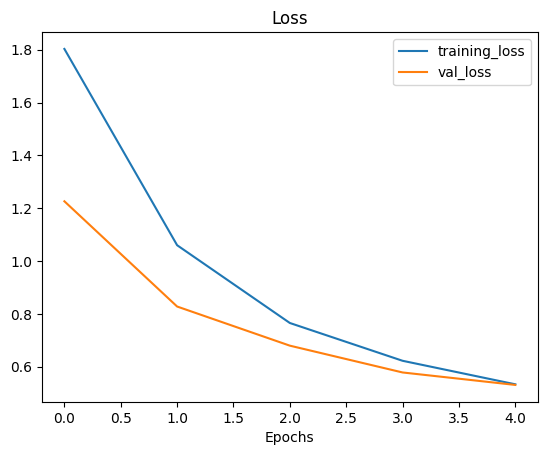

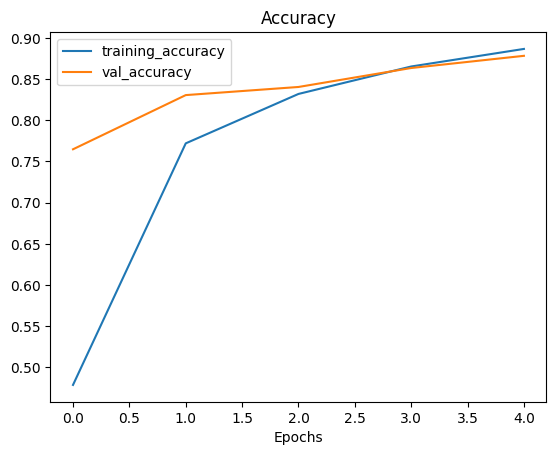

In [3]:
import helper_utils

helper_utils.plot_loss_curves(history)

1/1 [==============================] - 0s 34ms/step
Predicted class: chicken_wings


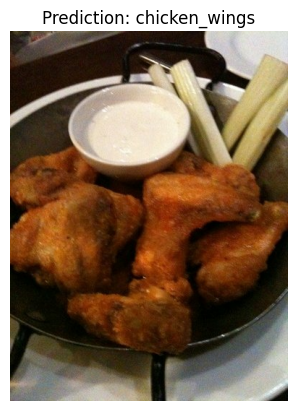

In [145]:
test_image = "10_food_classes_10_percent/test/chicken_wings/22089.jpg"

helper_utils.pred_and_plot_jeff(model, test_data.class_names, test_image, img_shape=224)

In [5]:
input_shape = (1, 4, 4, 3)
input_tensor = tf.random.normal(input_shape)
print(f"input_tensor: {input_tensor}")

global_avg_pooling_tensor = tf_keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"global_avg_pooling_tensor: {global_avg_pooling_tensor}")

global_max_pooling_tensor = tf_keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f"global_max_pooling_tensor: {global_max_pooling_tensor}")


input_tensor: [[[[-0.05660276 -0.4703141   1.7693459 ]
   [-0.23078504  1.2237092  -0.18295456]
   [ 0.4687196   0.33399397 -0.647973  ]
   [ 0.35940066 -0.8056706   1.2414068 ]]

  [[-0.65789914  0.9732642  -0.20092987]
   [-0.68940836  0.5798204   1.1105719 ]
   [ 0.09671792  0.68289244  0.08403014]
   [-0.48752463  1.8830137   0.29240885]]

  [[ 0.33320343 -0.9642595  -0.7342831 ]
   [-0.6015444  -0.67433083 -1.0909127 ]
   [-0.7487531   0.11012539  0.14024596]
   [-1.9662176  -0.14015862 -0.87470144]]

  [[ 0.05076155 -1.1956599   0.7451956 ]
   [ 0.12162837  0.19330049 -0.46625757]
   [-0.58628935  1.8127538   1.1913972 ]
   [ 2.127899   -0.85043025  0.86305046]]]]
global_avg_pooling_tensor: [[-0.15416837  0.16825311  0.20247754]]
global_max_pooling_tensor: [[2.127899  1.8830137 1.7693459]]


In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-12-10 17:21:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: '10_food_classes_1_percent.zip'

10_food_classes_1_p 100%[===================>] 127.42M  18.1MB/s    in 8.2s    

2024-12-10 17:21:09 (15.5 MB/s) - '10_food_classes_1_percent.zip' saved [133612354/133612354]



In [9]:
import zipfile

zip_ref = zipfile.ZipFile('10_food_classes_1_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [11]:
import tf_keras

train_data_1_percent = tf_keras.preprocessing.image_dataset_from_directory(directory="10_food_classes_1_percent/train", image_size=(224, 224), batch_size=32, label_mode='categorical')
test_data_1_percent = tf_keras.preprocessing.image_dataset_from_directory(directory="10_food_classes_1_percent/test", image_size=(224, 224), batch_size=32, label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [22]:
data_augmentation = tf_keras.Sequential([
    tf_keras.layers.RandomFlip("horizontal"),
    tf_keras.layers.RandomRotation(0.2),
    tf_keras.layers.RandomZoom(0.2),
    tf_keras.layers.RandomHeight(0.2),
    tf_keras.layers.RandomWidth(0.2),
    #tf_keras.layers.Rescaling(1./255), #For ResNet50V2
], name="data_augmentation")

(np.float64(-0.5), np.float64(514.5), np.float64(469.5), np.float64(-0.5))

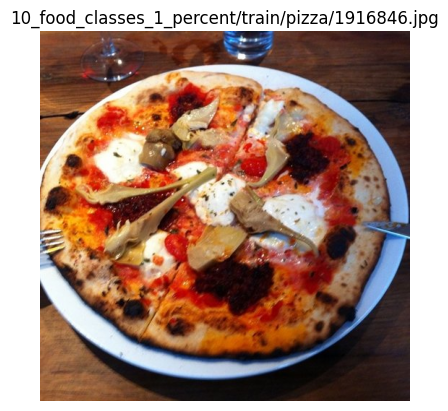

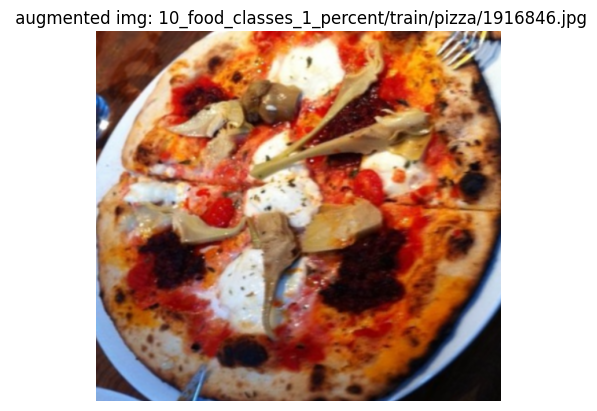

In [48]:
#Visualise the augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img/255.)
plt.title(random_image_path)
plt.axis('off')


augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f" augmented img: {random_image_path}")
plt.axis('off')

In [50]:
base_model = tf_keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf_keras.layers.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf_keras.layers.GlobalAveragePooling2D()(x)

outputs = tf_keras.layers.Dense(10, activation="softmax")(x)
model_1 = tf_keras.Model(inputs=inputs, outputs=outputs)
model_1.compile(loss='categorical_crossentropy',optimizer=tf_keras.optimizers.Adam(),metrics=['accuracy'])
history = model_1.fit(train_data_1_percent, epochs=5, steps_per_epoch=len(train_data_1_percent), validation_data=test_data_1_percent, validation_steps=int(0.25 *len(test_data_1_percent)))

Epoch 1/5
3/3 [==============================] - 6s 944ms/step - loss: 2.4204 - accuracy: 0.0714 - val_loss: 2.2453 - val_accuracy: 0.1431
Epoch 2/5
3/3 [==============================] - 1s 495ms/step - loss: 2.1702 - accuracy: 0.2143 - val_loss: 2.0999 - val_accuracy: 0.2664
Epoch 3/5
3/3 [==============================] - 1s 498ms/step - loss: 1.9653 - accuracy: 0.4000 - val_loss: 2.0078 - val_accuracy: 0.3141
Epoch 4/5
3/3 [==============================] - 1s 493ms/step - loss: 1.7484 - accuracy: 0.5286 - val_loss: 1.9179 - val_accuracy: 0.3964
Epoch 5/5
3/3 [==============================] - 1s 483ms/step - loss: 1.6736 - accuracy: 0.5714 - val_loss: 1.8088 - val_accuracy: 0.4523


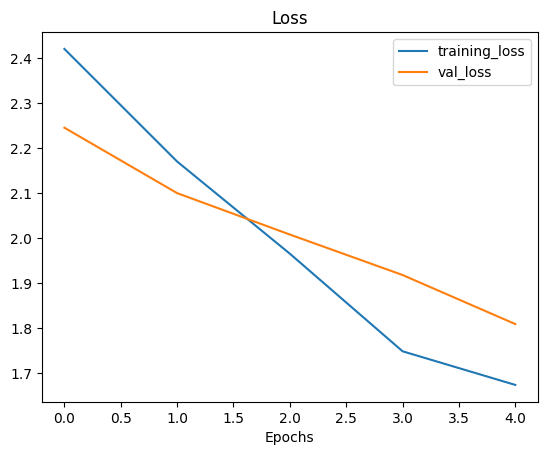

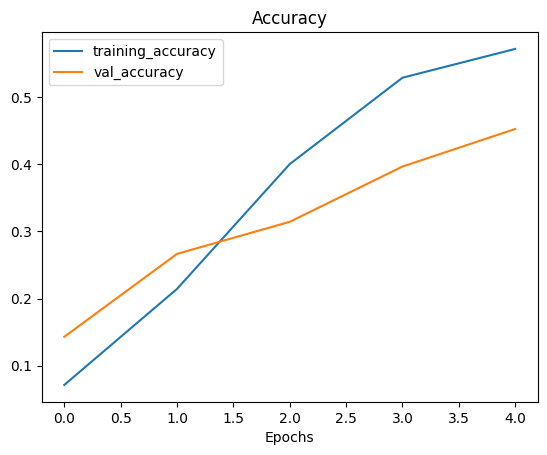

In [51]:
helper_utils.plot_loss_curves(history)

In [55]:
#Train with 10 Percent now
train_data_10_percent = tf_keras.preprocessing.image_dataset_from_directory(directory="10_food_classes_10_percent/train", image_size=(224,224), batch_size=32, label_mode='categorical')
test_data_10_percent = tf_keras.preprocessing.image_dataset_from_directory(directory="10_food_classes_10_percent/test", image_size=(224,224), batch_size=32, label_mode='categorical')

data_augmentation = tf_keras.Sequential([
    tf_keras.layers.RandomFlip("horizontal"),
    tf_keras.layers.RandomRotation(0.2),
    tf_keras.layers.RandomZoom(0.2),
    tf_keras.layers.RandomHeight(0.2),
    tf_keras.layers.RandomWidth(0.2),
])

base_model = tf_keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf_keras.layers.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf_keras.layers.GlobalAveragePooling2D()(x)
outputs = tf_keras.layers.Dense(10, activation="softmax")(x)
model_2 = tf_keras.Model(inputs=inputs, outputs=outputs)
model_2.compile(loss='categorical_crossentropy',optimizer=tf_keras.optimizers.Adam(),metrics=['accuracy'])
history = model_2.fit(train_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data_10_percent, validation_steps=int(0.25 *len(test_data_10_percent)))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/5
24/24 [==============================] - 9s 180ms/step - loss: 1.9583 - accuracy: 0.3720 - val_loss: 1.4352 - val_accuracy: 0.6908
Epoch 2/5
24/24 [==============================] - 3s 136ms/step - loss: 1.2994 - accuracy: 0.6947 - val_loss: 1.0118 - val_accuracy: 0.7697
Epoch 3/5
24/24 [==============================] - 4s 142ms/step - loss: 0.9774 - accuracy: 0.7787 - val_loss: 0.8066 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 3s 140ms/step - loss: 0.8253 - accuracy: 0.8053 - val_loss: 0.7041 - val_accuracy: 0.8273
Epoch 5/5
24/24 [==============================] - 4s 146ms/step - loss: 0.7266 - accuracy: 0.8213 - val_loss: 0.6158 - val_accuracy: 0.8487


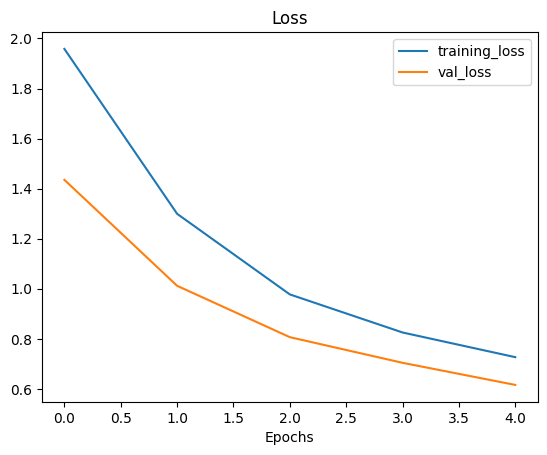

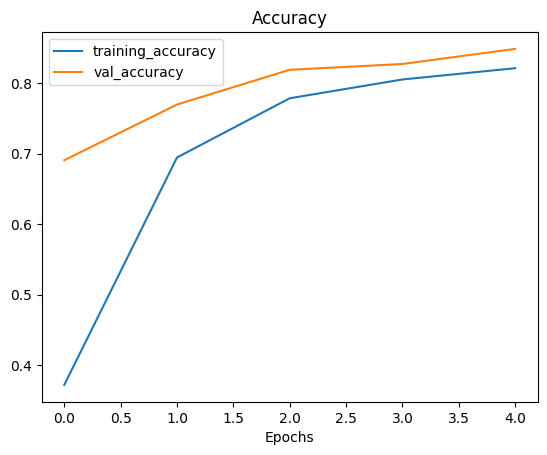

In [56]:
helper_utils.plot_loss_curves(history)

In [57]:
model_1.evaluate(test_data_1_percent)
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 3s 38ms/step - loss: 0.6174 - accuracy: 0.8456


[0.6174325942993164, 0.8456000089645386]

In [58]:
#Train all data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-12-10 18:47:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

10_food_classes_all 100%[===================>] 495.13M  20.9MB/s    in 25s     

2024-12-10 18:48:19 (20.2 MB/s) - '10_food_classes_all_data.zip' saved [519183241/519183241]



In [59]:
import zipfile

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [81]:
train_data = tf_keras.preprocessing.image_dataset_from_directory("10_food_classes_all_data/train", image_size=(224,224), batch_size=32, label_mode='categorical')
test_data = tf_keras.preprocessing.image_dataset_from_directory("10_food_classes_all_data/test", image_size=(224,224), batch_size=32, label_mode='categorical')

data_augmentation = tf_keras.Sequential([
    tf_keras.layers.RandomFlip("horizontal"),
    tf_keras.layers.RandomRotation(0.2),
    tf_keras.layers.RandomZoom(0.2),
    tf_keras.layers.RandomHeight(0.2),
    tf_keras.layers.RandomWidth(0.2),
])

base_model = tf_keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf_keras.layers.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf_keras.layers.GlobalAveragePooling2D()(x)
x = tf_keras.layers.Dense(10, activation="softmax")(x)
model_3 = tf_keras.Model(inputs=inputs, outputs=x)
model_3.compile(loss="categorical_crossentropy",optimizer=tf_keras.optimizers.Adam(),metrics=['accuracy'])
history = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=int(0.25 *len(test_data)))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 29s 105ms/step - loss: 1.0144 - accuracy: 0.7041 - val_loss: 0.4856 - val_accuracy: 0.8635
Epoch 2/5
235/235 [==============================] - 25s 106ms/step - loss: 0.6214 - accuracy: 0.8125 - val_loss: 0.4045 - val_accuracy: 0.8783
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 0.5458 - accuracy: 0.8285 - val_loss: 0.4094 - val_accuracy: 0.8684
Epoch 4/5
235/235 [==============================] - 22s 92ms/step - loss: 0.5092 - accuracy: 0.8405 - val_loss: 0.3562 - val_accuracy: 0.8816
Epoch 5/5
235/235 [==============================] - 22s 91ms/step - loss: 0.4799 - accuracy: 0.8497 - val_loss: 0.3550 - val_accuracy: 0.8931


1/1 [==============================] - 0s 31ms/step
Predicted class: steak


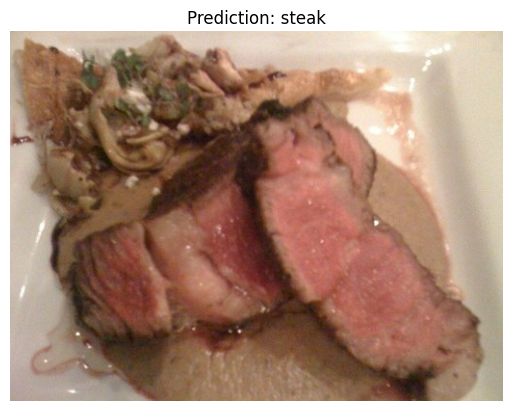

In [143]:
import importlib
import helper_utils

test_image = "10_food_classes_all_data/test/steak/27415.jpg"

importlib.reload(helper_utils)
helper_utils.pred_and_plot_jeff(model_3, test_data.class_names, test_image, img_shape=224)